#Basketball-reference Decision Tree with Cross Validation.train_test_split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import numpy as np
#import pylab as pl
#import csv 
from sklearn.decomposition    import RandomizedPCA 
from sklearn.svm              import SVC 
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import ShuffleSplit 
from sklearn.cross_validation import cross_val_score 
from collections              import defaultdict
from pandas.stats.api         import ols
from sklearn                  import preprocessing

###Read Player Seaaon CSV

In [2]:
df_Season = pd.read_csv('e:\\nba\\Season_Quartile.csv', header=0)
df_Season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3439
Data columns (total 38 columns):
Season       3440 non-null object
Age          3440 non-null float64
Tm           3440 non-null object
Lg           3440 non-null object
Pos          3440 non-null object
G            3440 non-null float64
MP           3440 non-null float64
PER          3440 non-null float64
TS_Per       3440 non-null float64
Three_Per    3440 non-null float64
FT_Per       3440 non-null float64
ORB_Per      3440 non-null float64
DRB_Per      3440 non-null float64
TRB_Per      3440 non-null float64
AST_Per      3440 non-null float64
STL_Per      3440 non-null float64
BLK_Per      3440 non-null float64
TOV_Per      3440 non-null float64
USG_Per      3440 non-null float64
OWS          3440 non-null float64
DWS          3440 non-null float64
WS           3440 non-null float64
WS48         3440 non-null float64
OBPM         3440 non-null float64
DBPM         3440 non-null float64
BPM          3440 non-

###Read Player Playoffs CSV

In [3]:
df_Playoffs = pd.read_csv('e:\\nba\\Playoffs_Quartile.csv', header=0)
df_Playoffs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1595 entries, 0 to 1594
Data columns (total 38 columns):
Season       1595 non-null object
Age          1595 non-null float64
Tm           1595 non-null object
Lg           1595 non-null object
Pos          1595 non-null object
G            1595 non-null float64
MP           1595 non-null float64
PER          1595 non-null float64
TS_Per       1595 non-null float64
Three_Per    1595 non-null float64
FT_Per       1595 non-null float64
ORB_Per      1595 non-null float64
DRB_Per      1595 non-null float64
TRB_Per      1595 non-null float64
AST_Per      1595 non-null float64
STL_Per      1595 non-null float64
BLK_Per      1595 non-null float64
TOV_Per      1595 non-null float64
USG_Per      1595 non-null float64
OWS          1595 non-null float64
DWS          1595 non-null float64
WS           1595 non-null float64
WS48         1595 non-null float64
OBPM         1595 non-null float64
DBPM         1595 non-null float64
BPM          1595 non-

###Init Column

In [4]:
vars_list = ['Age','G','MP','EFF','GmSc','PER','ORtg','DRtg','AST_Per','STL_Per','BLK_Per',
             'TOV_Per','TS_Per','FT_Per','Three_Per','ORB_Per','DRB_Per','TRB_Per','USG_Per']
data   = df_Season[vars_list]
target = df_Season['Quartile']

###Normalization

In [5]:
df_tmp = df_Season[vars_list] 
#df_tmp[:,'Salary'] = df_Season_Quartile['Salary']
df_tmp.describe()

df_Season_norm = (df_tmp - df_tmp.min()) / (df_tmp.max() - df_tmp.min())
df_Season_norm.head(5)

,Age,G,MP,EFF,GmSc,PER,ORtg,DRtg,AST_Per,STL_Per,BLK_Per,TOV_Per,TS_Per,FT_Per,Three_Per,ORB_Per,DRB_Per,TRB_Per,USG_Per
0,0.047619,0.975309,0.674213,0.472222,0.439829,0.537108,0.477679,0.899160,0.189624,0.182692,0.252874,0.121,0.490602,0.033833,0.038,0.158813,0.251108,0.356948,0.384279
1,0.142857,0.876543,0.794178,0.472222,0.527681,0.529457,0.450893,0.966387,0.339893,0.144231,0.120690,0.160,0.493421,0.079167,0.268,0.064572,0.113737,0.155313,0.567686
2,0.000000,0.864198,0.324316,0.250000,0.273277,0.526396,0.450893,0.882353,0.246869,0.221154,0.091954,0.185,0.511278,0.065500,0.322,0.085515,0.128508,0.185286,0.539301
3,0.190476,0.975309,0.270803,0.166667,0.200434,0.500383,0.437500,0.890756,0.359571,0.221154,0.022989,0.184,0.461466,0.076333,0.279,0.054101,0.129985,0.163488,0.410480
4,0.142857,1.000000,0.744487,0.416667,0.420258,0.527927,0.486607,0.924370,0.248658,0.153846,0.017241,0.128,0.508459,0.045667,0.328,0.082024,0.162482,0.215259,0.467249


In [6]:
df_tmp = df_Playoffs[vars_list] 
#df_tmp[:,'Salary'] = df_Playoffs['Salary']
df_tmp.describe()

df_Playoffs_norm = (df_tmp - df_tmp.min()) / (df_tmp.max() - df_tmp.min())
df_Playoffs_norm.head(5)

,Age,G,MP,EFF,GmSc,PER,ORtg,DRtg,AST_Per,STL_Per,BLK_Per,TOV_Per,TS_Per,FT_Per,Three_Per,ORB_Per,DRB_Per,TRB_Per,USG_Per
0,0.000000,0.32,0.123262,0.200,0.211723,0.399191,0.348432,0.866142,0.164,0.100000,0.023551,0.170,0.362000,0.13625,0.418,0.014925,0.119948,0.116438,0.460587
1,0.190476,0.20,0.031511,0.075,0.092039,0.300742,0.209059,0.866142,0.307,0.123077,0.000000,0.328,0.216667,0.06825,0.455,0.000000,0.140808,0.123288,0.400309
2,0.095238,0.08,0.115848,0.625,0.572461,0.445044,0.393728,0.968504,0.137,0.130769,0.041667,0.071,0.331333,0.01475,0.020,0.189055,0.196871,0.296804,0.315301
3,0.190476,0.12,0.013902,0.075,0.083442,0.280512,0.198606,0.905512,0.117,0.261538,0.097826,0.182,0.185333,0.00000,0.444,0.127695,0.000000,0.086758,0.500773
4,0.000000,0.04,0.003707,0.050,0.075856,0.202967,0.000000,0.771654,0.000,0.000000,0.380435,0.000,0.000000,0.25000,0.500,0.000000,0.428944,0.358447,0.531685


## Loading Data

In [7]:
size=3440      #import train data
testsize=0.25

#traindata
a = []
a = df_Season_norm[:size].values.tolist()

b=[]
for i in range(size):  
       b.append(map(int,a[i])) #轉置
data=np.array(b)

#target
c= []
c = target[:size].values.tolist()

d=[]
for i in range(size):  
     d.append(c[i][0]);
#Ta=np.array(c)
#target=np.array(d)

a=b=c=d=[]

## Print Information

In [8]:
X, y = data, target
print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print("classes: %r" % list(np.unique(y)))
#print("classes: %r" % list(y))

n_samples, n_features = X.shape

print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)

#test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=testsize, random_state=0)
 
print("train data shape: %r, train target shape: %r"  % (X_train.shape, y_train.shape)) 
print("test data shape: %r, test target shape: %r"  % (X_test.shape, y_test.shape)) 

data shape: (3440L, 19L), target shape: (3440L,)
classes: ['Q1', 'Q2', 'Q3', 'Q4']
n_samples=3440
n_features=19
train data shape: (2580L, 19L), train target shape: (2580L,)
test data shape: (860L, 19L), test target shape: (860L,)


###Decision Tree

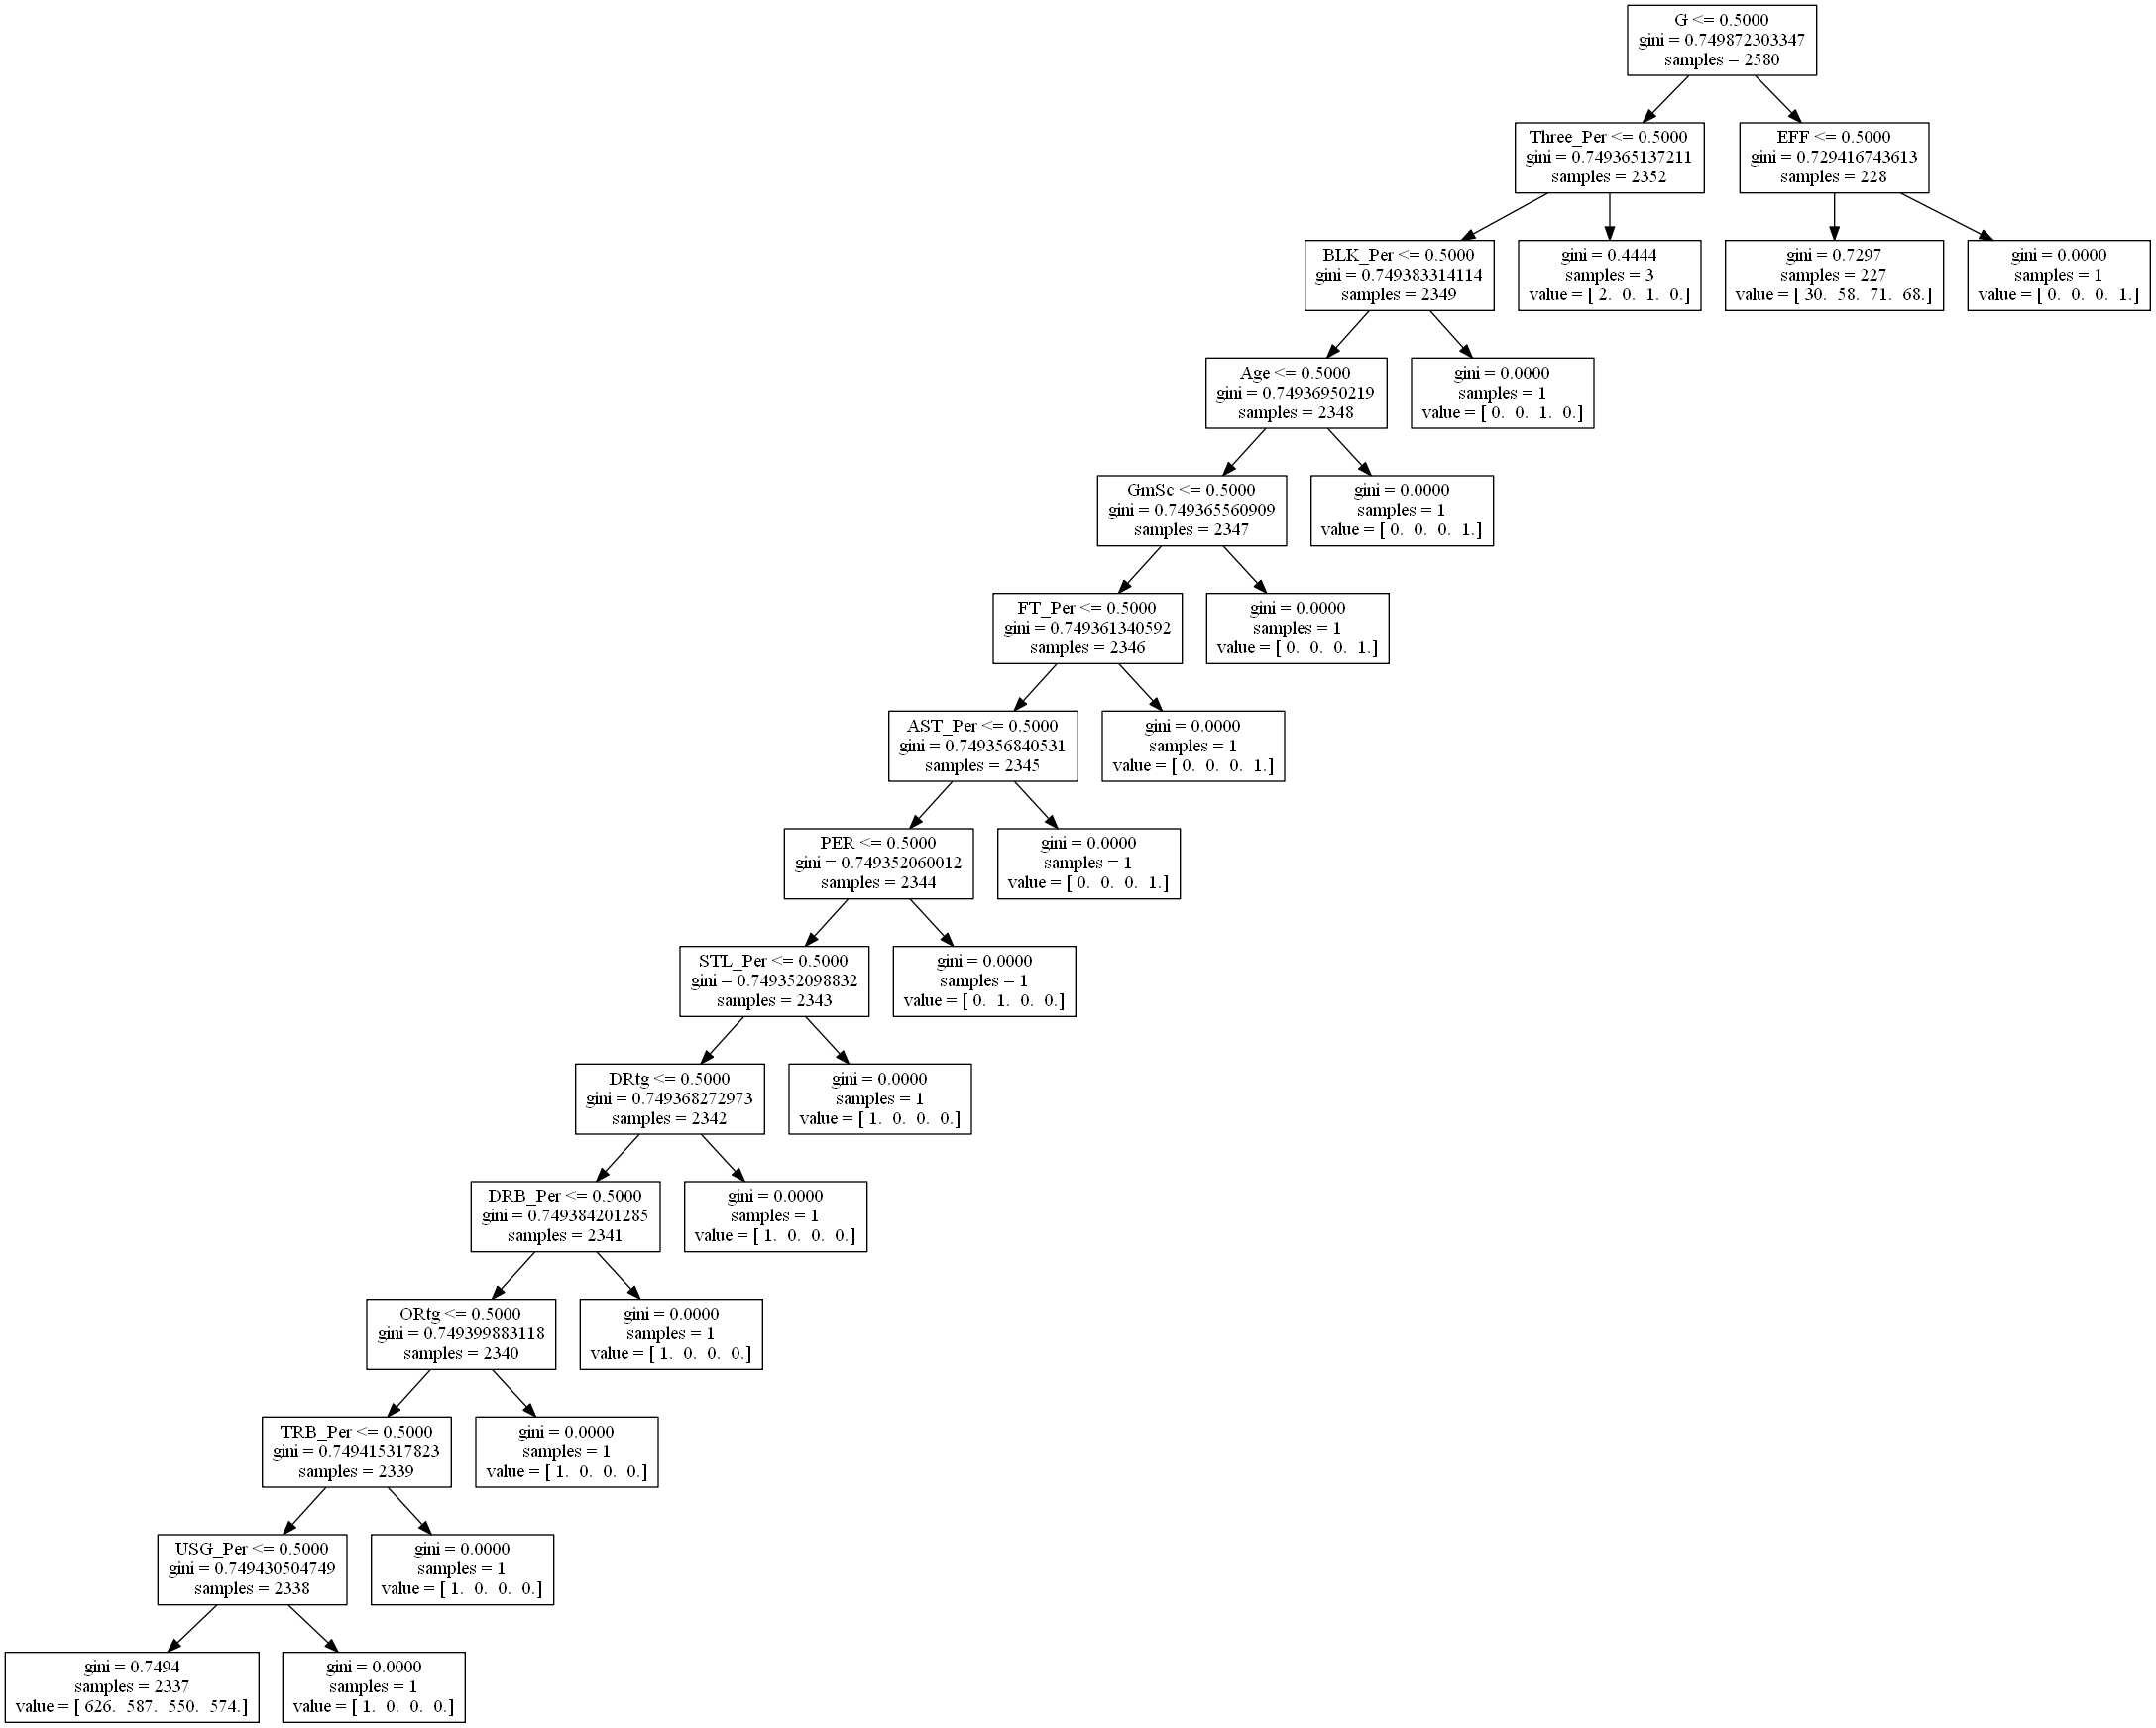

In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import StringIO, pydot

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=100,min_samples_leaf=3)
clf = tree.DecisionTreeClassifier(random_state=99)
clf = clf.fit(X_train,y_train)

dot_data = StringIO.StringIO()  
tree.export_graphviz(clf, out_file=dot_data,feature_names=vars_list)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [21]:
print clf.classes_ 

#print clf.feature_importances_

for i in xrange(len(clf.feature_importances_)):        
    print "[%-10s] gini value:[%f]" % (vars_list[i],clf.feature_importances_[i])

['Q1' 'Q2' 'Q3' 'Q4']
[Age       ] gini value:[0.046700]
[G         ] gini value:[0.360537]
[MP        ] gini value:[0.000000]
[EFF       ] gini value:[0.041137]
[GmSc      ] gini value:[0.046740]
[PER       ] gini value:[0.046124]
[ORtg      ] gini value:[0.043910]
[DRtg      ] gini value:[0.043835]
[AST_Per   ] gini value:[0.046820]
[STL_Per   ] gini value:[0.043798]
[BLK_Per   ] gini value:[0.048128]
[TOV_Per   ] gini value:[0.000000]
[TS_Per    ] gini value:[0.000000]
[FT_Per    ] gini value:[0.046780]
[Three_Per ] gini value:[0.053684]
[ORB_Per   ] gini value:[0.000000]
[DRB_Per   ] gini value:[0.043873]
[TRB_Per   ] gini value:[0.043948]
[USG_Per   ] gini value:[0.043985]


#Below Not Finish

## Configure

In [30]:
#control
size=3440      #import train data
testsize=0.2    
C1=100           # default
gamma1=0.0000001 # default

#Cross Validation & ShuffleSplit
times=5


## Training

In [34]:
#train
svc= SVC(kernel='rbf', C=C1, gamma=gamma1).fit(X_train, y_train)
#train_score = svc.score(X_train, y_train) 
#print train_score 
#test_score = svc.score(X_test, y_test)
#print test_score 

# Cross Validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: 
a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting.
To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

In [6]:
clf = SVC(kernel='rbf',  C=C1, gamma=gamma1)
scores = cross_val_score(clf, X, y, cv=times)
scores

array([ 0.97535714,  0.97678571,  0.97761905,  0.97333333,  0.9752381 ])

## Cross Validation Iteration

## Random permutations cross-validation a.k.a. Shuffle & Split

* The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. 
* Samples are first shuffled and then split into a pair of train and test sets.
* It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number * generator.

In [7]:
#CV
cv = ShuffleSplit(n_samples, n_iter=times, test_size=testsize,random_state=0)
 
for cv_index, (train, test) in enumerate(cv):
   print("# Cross Validation Iteration #%d" % cv_index)
 #  print("train indices: {0}...".format(train[:10]))
 #  print("test indices: {0}...".format(test[:10]))  
    
   svc = SVC(kernel="rbf", C=C1, gamma=gamma1).fit(X[train], y[train])
   print("train score: {0:.3f}, test score: {1:.3f}\n".format(
       svc.score(X[train], y[train]), svc.score(X[test], y[test])))


# Cross Validation Iteration #0
train score: 1.000, test score: 0.978

# Cross Validation Iteration #1
train score: 1.000, test score: 0.975

# Cross Validation Iteration #2
train score: 1.000, test score: 0.980

# Cross Validation Iteration #3
train score: 1.000, test score: 0.977

# Cross Validation Iteration #4
train score: 1.000, test score: 0.975



## Find gamma

* gamma : float, optional (default=0.0)
* Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is 0.0 then 1/n_features will be used instead.

In [ ]:
#CV

n_gammas = 10
n_iter = 5|
cv = ShuffleSplit(n_samples, n_iter=n_iter, train_size=int(size*0.8), test_size=int(size*0.2), random_state=0)
 
train_scores = np.zeros((n_gammas, n_iter))
test_scores = np.zeros((n_gammas, n_iter))
gammas = np.logspace(-10, -3, n_gammas)
 
for i, gamma in enumerate(gammas):
    for j, (train, test) in enumerate(cv):
        clf = SVC(C=10, gamma=gamma).fit(X[train], y[train])
        train_scores[i, j] = clf.score(X[train], y[train])
        test_scores[i, j] = clf.score(X[test], y[test])
		
#draw
for i in range(n_iter):
    pl.semilogx(gammas, train_scores[:, i], alpha=0.4, lw=2, c='b')
    pl.semilogx(gammas, test_scores[:, i], alpha=0.4, lw=2, c='g')
pl.ylabel("score for SVC(C=100, gamma=gamma)")
pl.xlabel("gamma")
#pl.text(1e-6, 0.5, "Underfitting", fontsize=16, ha='center', va='bottom')
#pl.text(1e-4, 0.5, "Good", fontsize=16, ha='center', va='bottom')
#pl.text(1e-2, 0.5, "Overfitting", fontsize=16, ha='center', va='bottom')
#pl.show()

## Find C

* C : float, optional (default=1.0)
* Penalty parameter C of the error term.

In [10]:
n_Cs = 12
n_iter = 6
cv = ShuffleSplit(n_samples, n_iter=n_iter, train_size=500, test_size=500,
    random_state=0)
 
train_scores = np.zeros((n_Cs, n_iter))
test_scores = np.zeros((n_Cs, n_iter))
Cs = np.logspace(-5,5 , n_Cs)
 
for i, C in enumerate(Cs):
    for j, (train, test) in enumerate(cv):
        clf = SVC(C=C, gamma=1e-6).fit(X[train], y[train])
        train_scores[i, j] = clf.score(X[train], y[train])
        test_scores[i, j] = clf.score(X[test], y[test])
#draw
for i in range(n_iter):
    pl.semilogx(Cs, train_scores[:, i], alpha=0.4, lw=2, c='b')
    pl.semilogx(Cs, test_scores[:, i], alpha=0.4, lw=2, c='g')
pl.ylabel("score for SVC(C=C, gamma=1e-3)")
pl.xlabel("C")
#pl.text(1e-6, 0.5, "Underfitting", fontsize=16, ha='center', va='bottom')
#pl.text(1e3, 0.5, "Few Overfitting", fontsize=16, ha='center', va='bottom')
#pl.show()

# Grid_search

* Exhaustive search over specified parameter values for an estimator.
* Important members are fit, predict.
* GridSearchCV implements a “fit” method and a “predict” method like any classifier except that the parameters of the classifier used to predict is optimized by cross-validation.

In [ ]:
from sklearn.grid_search import GridSearchCV
from pprint import pprint
svc_params = {
    'C': np.logspace(-1, 2, 2),
    'gamma': np.logspace(-4, 0, 2),
    #'C': np.logspace(-1, 2, 4),
    #'gamma': np.logspace(-4, 0, 5),
    #'C': np.logspace(-1.3, 2.3, 2.3),
    #'gamma': np.logspace(-4.5, -2, 10),
}
 

gs_svc = GridSearchCV(SVC(), svc_params, cv=times, n_jobs=5)
 
gs_svc.fit(X_train, y_train)
 
print gs_svc.best_params_, gs_svc.best_score_ 

## PCA

* Principal component analysis (PCA)
* Linear dimensionality reduction using Singular Value Decomposition of the data and keeping only the most significant singular vectors to project the data to a lower dimensional space.
* This implementation uses the scipy.linalg implementation of the singular value decomposition. It only works for dense arrays and is not scalable to large dimensional data.
* The time complexity of this implementation is O(n ** 3) assuming n ~ n_samples ~ n_features.

In [12]:
from itertools import cycle

pca = RandomizedPCA(n_components=2)
X_pca = pca.fit_transform(X)

#print X_pca.shape 


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
#print y
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    pl.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
        c=c, marker=m, label=i, alpha=0.5)
     
pl.legend(loc='best')
pl.show()

## Linear Discriminant Analysis (LDA)

* A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
* The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
* The fitted model can also be used to reduce the dimensionality of the input, by projecting it to the most discriminative directions.

In [13]:
from sklearn.lda import LDA
from itertools import cycle

lda = LDA(n_components=2)

X_lda3= lda.fit(X,y).transform(X)

print X_lda3.shape 


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
y_train
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    pl.scatter(X_lda3[y == i, 0], X_lda3[y == i, 1], 
        c=c, marker=m, label=i, alpha=0.5)
     
pl.legend(loc='best')
pl.show()

(1000L, 2L)


C:\Anaconda\lib\site-packages\sklearn\lda.py:162: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## OUTPUT

In [21]:
#testdata
ta= []

"""
with open("test.csv",'rt') as f:
    reader = csv.reader(f)    
    for row in reader:
        ta.append(map(int,row))
f.close
"""
test_df = pd.read_csv('test.csv', header=0)
ta = test_df.values.tolist()
tdata=np.array(ta)
ta=[]
#testdata

#test_df.info()

#answer= []
x=[]
x= [svc.predict(tdata)]
answer=map(list, zip(*x))

"""
output_df = pd.DataFrame(answer)
#output_df.info()

output_file = open("answer.csv", "wb")
output_df.to_csv(output_file)
output_file.close()
"""

f2 = open("answer.csv","wb") 
w = csv.writer(f2)  
w.writerows(answer)  
f2.close() 
